In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_dir = "/content/drive/MyDrive/DS340_Final_Project/augmented_spectrograms_dataset_song"

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 16

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3240 images belonging to 8 classes.
Found 808 images belonging to 8 classes.


In [6]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
input_shape = (128, 128, 3)

In [7]:
song_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-4)),
        layers.MaxPooling2D(pool_size=(2, 2)), # add another max pooling
        layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-4)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        layers.Dropout(0.5),
        layers.Dense(8, activation='softmax'),
    ]
)

In [8]:
song_model.compile(loss="categorical_crossentropy", optimizer=Adam(1e-4), metrics=["accuracy"])

import keras.callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Quit after 3 rounds of no validation loss improvement
]

history = song_model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=callbacks) # add early stopping

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 981s 5s/step - accuracy: 0.2195 - loss: 2.6376 - val_accuracy: 0.3478 - val_loss: 2.3731
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.3302 - loss: 2.0350 - val_accuracy: 0.4814 - val_loss: 2.0597
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.4186 - loss: 1.7681 - val_accuracy: 0.5334 - val_loss: 1.7359
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.4870 - loss: 1.5472 - val_accuracy: 0.6337 - val_loss: 1.3828
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.5627 - loss: 1.3737 - val_accuracy: 0.6498 - val_loss: 1.2253
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6102 - loss: 1.2204 - val_accuracy: 0.6968 - val_loss: 1.0897
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.6588 - loss: 1.0817 - val_accuracy: 0.7252 - val_loss: 0.9898
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6958 - loss: 0.9752 - v

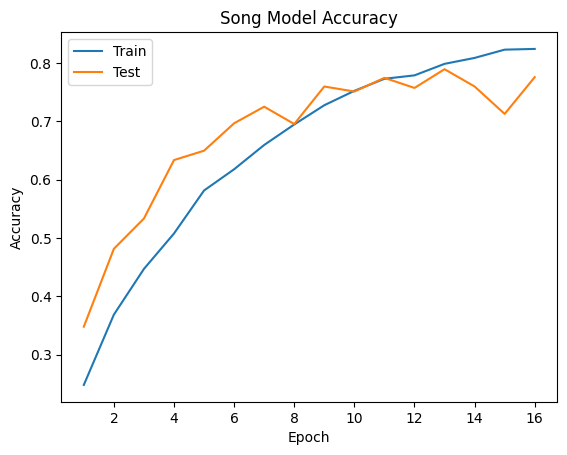

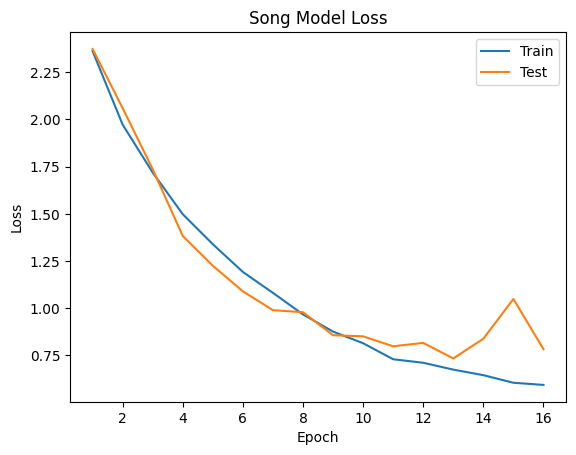

In [15]:
import matplotlib.pyplot as plt

# Retrieve metrics from the history object
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

# Plot training & validation accuracy
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Song Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Plot training & validation loss
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Song Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [10]:
"""
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
base = ResNet50(weights='imagenet',
                include_top=False,
                input_shape=(128,128,3))
base.trainable = False

x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(8, activation='softmax')(x)

model = Model(inputs=base.input, outputs=out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# 3. train
model.fit(train_generator, epochs=15, validation_data=val_generator, callbacks=callbacks)
"""

"\nfrom tensorflow.keras.applications import ResNet50\nfrom tensorflow.keras import layers, Model\nbase = ResNet50(weights='imagenet',\n                include_top=False,\n                input_shape=(128,128,3))\nbase.trainable = False\n\nx = layers.GlobalAveragePooling2D()(base.output)\nx = layers.Dropout(0.5)(x)\nx = layers.Dense(128, activation='relu')(x)\nx = layers.Dropout(0.5)(x)\nout = layers.Dense(8, activation='softmax')(x)\n\nmodel = Model(inputs=base.input, outputs=out)\nmodel.compile(optimizer='adam',\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])\nmodel.summary()\n\n# 3. train\nmodel.fit(train_generator, epochs=15, validation_data=val_generator, callbacks=callbacks)\n"

In [20]:
import numpy as np
from sklearn.metrics import classification_report, f1_score

y_pred_probs = song_model.predict(val_generator)
y_pred       = np.argmax(y_pred_probs, axis=1)
y_true       = val_generator.classes

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


In [21]:
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Weighted F1 score: {f1:.4f}")

Weighted F1 score: 0.7712


In [22]:
import numpy as np
from sklearn.metrics import classification_report


class_indices = val_generator.class_indices


idx2class = {idx: cls for cls, idx in class_indices.items()}
all_labels = sorted(idx2class.keys())
all_names  = [idx2class[idx] for idx in all_labels]


print(classification_report(
    y_true,
    y_pred,
    labels=all_labels,
    target_names=all_names,
    zero_division=0
))


              precision    recall  f1-score   support

       angry       0.91      0.73      0.81       147
        calm       0.80      0.90      0.85       147
     disgust       0.00      0.00      0.00         0
     fearful       0.73      0.46      0.57       147
       happy       0.80      0.82      0.81       147
     neutral       0.99      0.96      0.97        73
         sad       0.61      0.88      0.72       147
   surprised       0.00      0.00      0.00         0

    accuracy                           0.78       808
   macro avg       0.61      0.59      0.59       808
weighted avg       0.79      0.78      0.77       808

